In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

batchSizeX = [108, 115, 106, 97, 95, 91, 97, 83, 78, 54, 67, 56, 53, 61, 115, 81, 78, 30, 45, 99, 32, 25, 28, 90, 89]
machineEfficienciesY = [95, 96, 95, 97, 93, 94, 95, 93, 92, 86, 73, 80, 65, 69, 77, 96, 87, 89, 60, 63, 95, 61, 56, 94, 93]

# Convertir listas a arrays de NumPy y reformatear x para sklearn
x = np.array(batchSizeX).reshape(-1, 1)
y = np.array(machineEfficienciesY)

# Transformar x a características polinomiales (grado 2 en este ejemplo)
poly = PolynomialFeatures(degree=5) #Puedes cambiar el grado aquí.
x_poly = poly.fit_transform(x)

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(x_poly, y)

# Realizar predicciones
y_poly_pred = model.predict(x_poly)

# Calcular RMSE y R2
rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
r2 = r2_score(y, y_poly_pred)
print(f"RMSE: {rmse}")
print(f"R2: {r2}")



RMSE: 9.963271154932562
R2: 0.4589257956577957


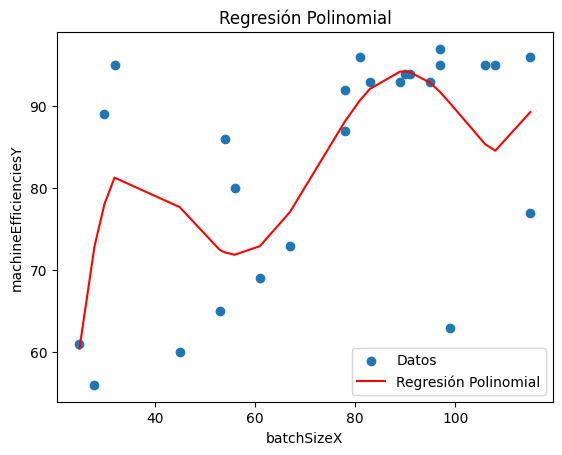

Coeficientes del modelo polinomial:
-556.9688124408183
[ 0.00000000e+00  5.61859151e+01 -1.85293587e+00  2.85456626e-02
 -2.06686994e-04  5.68037620e-07]


In [3]:
# Graficar los resultados
plt.scatter(x, y, label="Datos")
plt.plot(sorted(x), y_poly_pred[np.argsort(x[:, 0])], color='red', label="Regresión Polinomial")
plt.xlabel("batchSizeX")
plt.ylabel("machineEfficienciesY")
plt.title("Regresión Polinomial")
plt.legend()
plt.show()

# Imprimir los coeficientes del modelo polinomial
print("Coeficientes del modelo polinomial:")
print(model.intercept_)
print(model.coef_)